<h1 align=center><font size = 5>Application of Machine Learning in Predicting Customer Churn </font></h1>
<h1 align=center><font size = 4>By Norman Angel Agong</font></h1>
<h1 align=center><font size = 4>147513
</font></h1>

## Objectives

In this project, we will be able to:

* Identify the key indicators of customer churn
* Predict customer churn for tour and travels company based on customer data

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">Description of the Data</a></li>
        <li><a href="https://#research_questions">Research questions</a></li>
        <li><a href="https://#assumption_and_scope">Assumptions and scope</a></li>
        <li><a href="https://#eda">Exploratory Data Analysis</a></li>
        <li><a href="https://#preprocessing">Data pre-processing</a></li>
        <li><a href="https://#modeling">Modeling</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
    </ol>
</div>
<br>
<hr>


<h2 id="about_dataset">Description of the Data</h2>

We will use a Tour & Travels Company dataset for predicting customer churn. This dataset is obtained from Kaggle for a Tours and Travel company in the United States. This is a historical customer dataset where each row represents one customer offers straightforward insights. As it is more cost-effective to retain existing customers than acquire new ones, our primary goal in this analysis is to predict which customers will remain loyal to our services.

This data set will provide key indicators of customer churn allowing us to anticipate the behaviors that contribute to customer retention and predict what behavior will help us to retain customers.

The dataset includes information about:

*   Age of users
*   FrequesntFlyer: Wheather customer takes frequent flights
*   AnnualIncomeClass: Class of annual income of user
*   ServicesOpted: Number of times services opted during recent years
*   AccountSyncedToSocialMedia: Wheather Company Account of User is Synchronized to their Social Media
*   BookedHotelOrNot: Wheather the customer booked lodging/Hotels using company services
*   Target: 1 = Customers Churns, 0 = Customer Dosent Churn

Link to dataseton Kaggle: https://bit.ly/3rzy2Sw


<h2 id="research_questions">Research Questions</h2>

*   What are the factors that contribute to churn?
*   What are the key indicators of customer churn?

<h2 id="assumption_and_scope">Assumption</h2>

No unusual occurrences will have a substantial impact on the data we used (Outliers)

There are no unanticipated negative impacts to the company employing any advised technique

You can view the Notebook on Google Collab: https://colab.research.google.com/drive/1hwhGHlFTCqXj2ds5w8BABxaMDEK281RL#scrollTo=PPbI0in3-jew

In [1]:
pip install --upgrade scikit-learn

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [2]:
#Importing Libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# data pre-processing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load Data From CSV File


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/anormanangel/Datasets/main/Customertravel.csv")
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
# rename churn column for clarity

df.rename(columns={'Target': 'Churn'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Churn                       954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


## Exploratory Data Analysis

In [6]:
# Checking for columns with null values

df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Churn                         0
dtype: int64

In [7]:
df.shape

(954, 7)

In [8]:
#Summary of statistics separately for each group defined by the 'Churn' column

df.groupby('Churn').describe()

Age                                                    ServicesOpted  \
       count       mean       std   min   25%   50%   75%   max         count   
Churn                                                                           
0      730.0  32.352055  3.209323  27.0  30.0  31.0  35.0  38.0         730.0   
1      224.0  31.316964  3.620133  27.0  28.0  30.0  35.0  38.0         224.0   

                                                    
           mean       std  min  25%  50%  75%  max  
Churn                                               
0      2.402740  1.554495  1.0  1.0  2.0  3.0  6.0  
1      2.549107  1.763430  1.0  1.0  2.0  4.0  6.0

In [9]:
#Assess the distribution and characteristics of numerical data in the dataset

print("Statistical Summary")
df.describe().T

Statistical Summary


,count,mean,std,min,25%,50%,75%,max
Age,954.0,32.109015,3.337388,27.0,30.0,31.0,35.0,38.0
ServicesOpted,954.0,2.437107,1.606233,1.0,1.0,2.0,4.0,6.0
Churn,954.0,0.234801,0.424097,0.0,0.0,0.0,0.0,1.0


In [10]:
#Understanding the distribution of categorical data in your dataset

df.describe(include = 'object')

,FrequentFlyer,AnnualIncomeClass,AccountSyncedToSocialMedia,BookedHotelOrNot
count,954,954,954,954
unique,3,3,2,2
top,No,Middle Income,No,No
freq,608,409,594,576


In [11]:
# Calculate the correlation coefficients between all pairs of numerical columns in the DataFrame.

df.corr()

/var/folders/vq/zctkzbys72vgrrtgd956531m0000gn/T/ipykernel_30903/1324860978.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,ServicesOpted,Churn
Age,1.000000,-0.012422,-0.131534
ServicesOpted,-0.012422,1.000000,0.038646
Churn,-0.131534,0.038646,1.000000


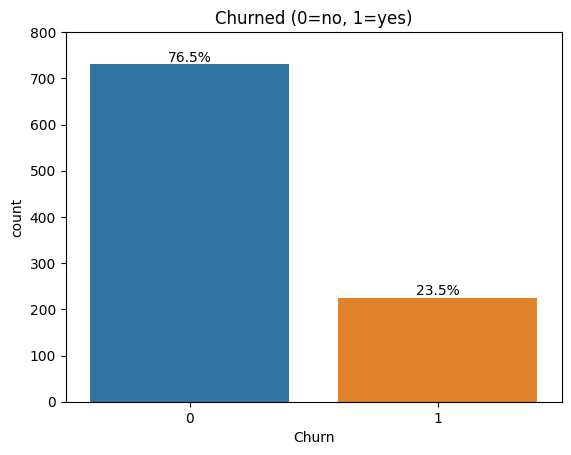

In [12]:
#Count plot with labeled bars showing the % of each category of the 'Churn' column

ax = sns.countplot(data=df, x='Churn')
percentage = df['Churn'].value_counts(normalize=True).values * 100
lbls = [f'{p:.1f}%' for p in percentage]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.ylim(top=800)
plt.title('Churned (0=no, 1=yes)');

The data is unbalanced, as around 76.5% are customers in the "no-churn" class (modest class imbalance 3:1), which needs to be taken into account when training and evaluating the models.

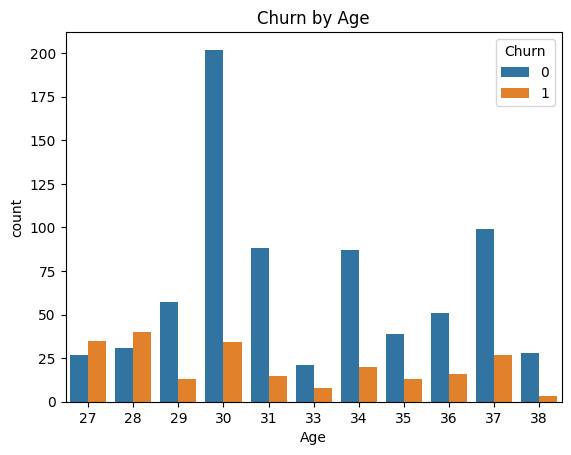

In [13]:
sns.countplot(data=df, x='Age', hue='Churn').set_title('Churn by Age');

It looks like younger customers (27-28y) tend to churn proportionally more often.

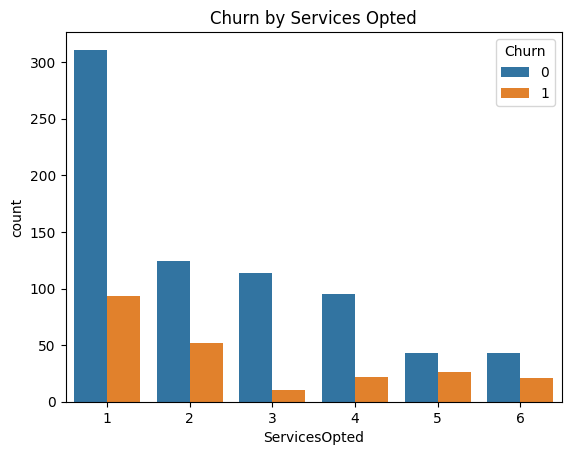

In [14]:
sns.countplot(data=df, x='ServicesOpted', hue='Churn').set_title('Churn by Services Opted');

Customers who opted for more services (5+) churned more than those opted for a few services

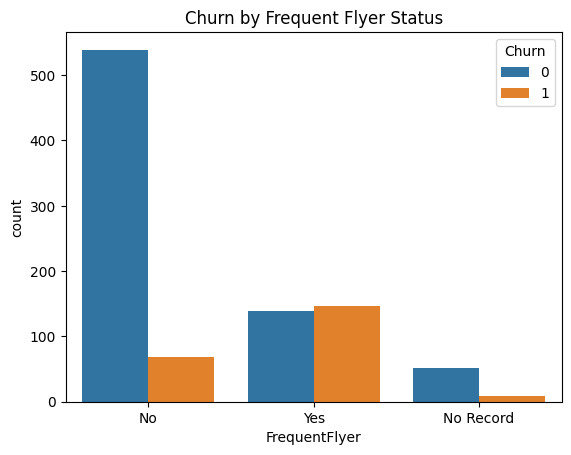

In [15]:
sns.countplot(data=df, x='FrequentFlyer', hue='Churn').set_title('Churn by Frequent Flyer Status');

It looks like frequent flyers churn more than non-frequent flyers.

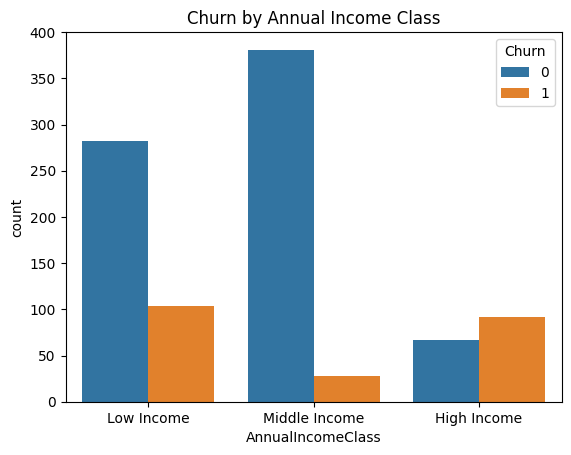

In [16]:
sns.countplot(data=df, x='AnnualIncomeClass', order=['Low Income','Middle Income','High Income'], hue='Churn').set_title('Churn by Annual Income Class');

It appears that high income individuals churn more than low and middle income classes.

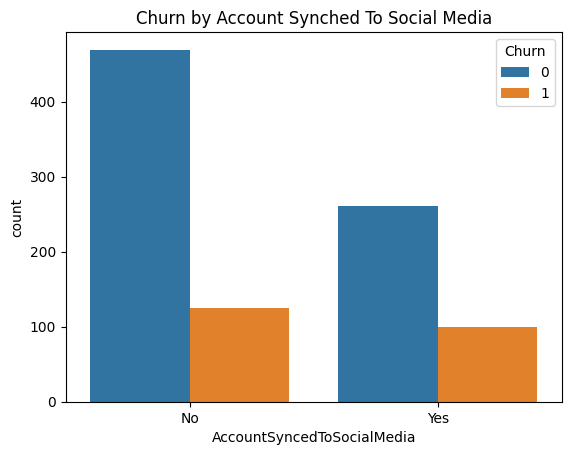

In [17]:
sns.countplot(data=df, x='AccountSyncedToSocialMedia', hue='Churn').set_title('Churn by Account Synched To Social Media');

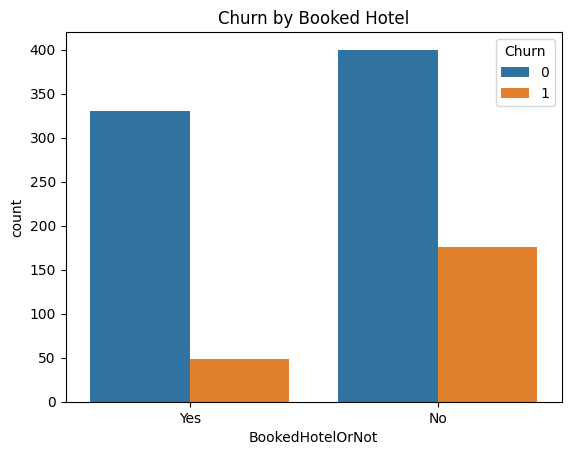

In [18]:
sns.countplot(data=df, x='BookedHotelOrNot', hue='Churn').set_title('Churn by Booked Hotel');

## Feature Enconding

In [19]:
# create copy for encoding

df_coded = df.copy()

In [20]:
# Label Encoding ordinal features for services

ordinals = ['ServicesOpted']
df_coded[ordinals] = df_coded[ordinals].apply(LabelEncoder().fit_transform)

In [21]:
#Manually adapt scaling for Annual Income Class as we need to implement the ordinal scale in order to get correct scaling

df_coded = df_coded.replace({'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2}})

In [22]:
# One-Hot Encoding non-ordinal features

dummies = ['BookedHotelOrNot', 'AccountSyncedToSocialMedia', 'FrequentFlyer']
df_coded = pd.get_dummies(df_coded, columns = dummies, drop_first=True)

In [23]:
#rename some cols for clarity

df_coded.rename(columns={'BookedHotelOrNot_Yes':'BookedHotel', 'AccountSyncedToSocialMedia_Yes':'AccountSyncedToSocialMedia'}, inplace=True)

#Check if our data us ready for ML
df_coded.head()

,Age,AnnualIncomeClass,ServicesOpted,Churn,BookedHotel,AccountSyncedToSocialMedia,FrequentFlyer_No Record,FrequentFlyer_Yes
0,34,1,5,0,1,0,0,0
1,34,0,4,1,0,1,0,1
2,37,1,2,0,0,1,0,0
3,30,1,1,0,0,0,0,0
4,30,0,0,0,0,0,0,0


Correlation matrix to explore relationships between variables.

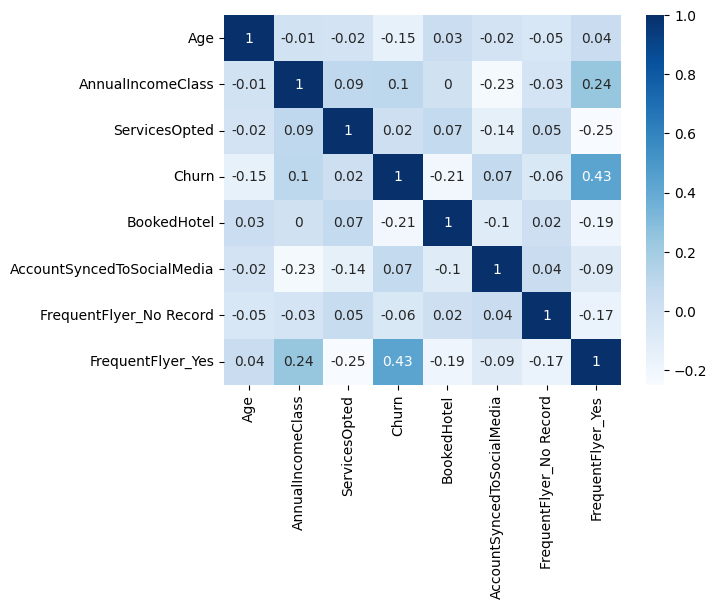

In [24]:
#Correlation matrix to explore relationships between variables.

sns.heatmap(np.round(df_coded.corr(method ='spearman'), 2), annot=True,  cmap='Blues');

Even though the correlation matrix needs to be interpreted with caution (as it's based on scaled variables, which is also why Spearman's correlation is used), it gives some indication that e.g. annual income class and frequent flyer status are correlated. This also indicates that frequent flyers are associated with churning.



## Model Creation and Evaluation

In [25]:
# Split the data into training and test set

X = df_coded.drop(columns='Churn', axis=1)
y = df_coded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
# Generic function to fit data and display results/predictions

def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)
    # make predictions for test data
    y_pred = clf.predict(X_test)
    # print evaluation
    print(classification_report(y_test, y_pred))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')

Unbalanced data is not optimal for machine learning. Here we test some classic algorithms but also explore some classifiers that specifically account for unbalanced data (using imlearn).

* Logistic regression * 

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       240
           1       0.65      0.37      0.47        75

    accuracy                           0.80       315
   macro avg       0.74      0.66      0.68       315
weighted avg       0.79      0.80      0.78       315


Confusion Matrix: 



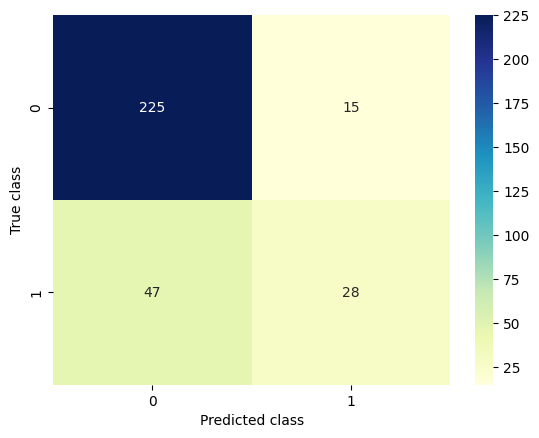

In [27]:
modelLR = LogisticRegression()
print('* Logistic regression * \n')
fit_evaluate(modelLR, X_train, X_test, y_train, y_test)

* Logistic regression * 

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       240
           1       0.50      0.76      0.60        75

    accuracy                           0.76       315
   macro avg       0.70      0.76      0.71       315
weighted avg       0.81      0.76      0.77       315


Confusion Matrix: 



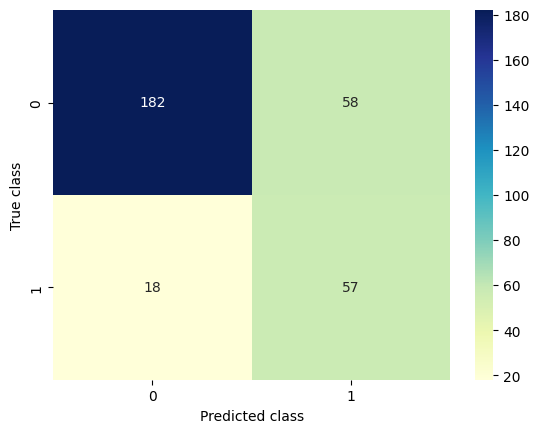

In [28]:
modelLR = LogisticRegression(class_weight='balanced')
print('* Logistic regression * \n')
fit_evaluate(modelLR, X_train, X_test, y_train, y_test)

Balancing the classes does not substantially improve the model. The prediction of the minority class gets better (at a cost of the majority class), as the model gets penalized more for errors in the minority class.

* Random Forest Classifier * 



              precision    recall  f1-score   support

           0       0.90      0.95      0.92       240
           1       0.79      0.67      0.72        75

    accuracy                           0.88       315
   macro avg       0.85      0.81      0.82       315
weighted avg       0.88      0.88      0.88       315


Confusion Matrix: 



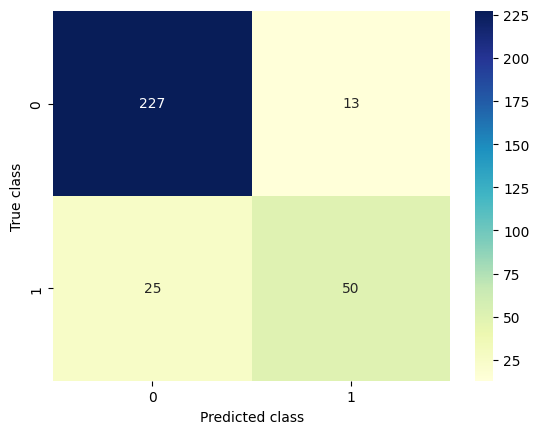

In [29]:
modelRF = RandomForestClassifier()
print('* Random Forest Classifier * \n')
fit_evaluate(modelRF, X_train, X_test, y_train, y_test)

The random forest classifier performs overall better than logistic regression. Next, testing if balancing the data improves the performance, particularly for the underrepresented class 1 (churned) using a balanced random forest classifier that randomly under-samples each boostrap sample to balance it.

* Balanced Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       240
           1       0.67      0.91      0.77        75

    accuracy                           0.87       315
   macro avg       0.82      0.88      0.84       315
weighted avg       0.90      0.87      0.88       315


Confusion Matrix: 



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


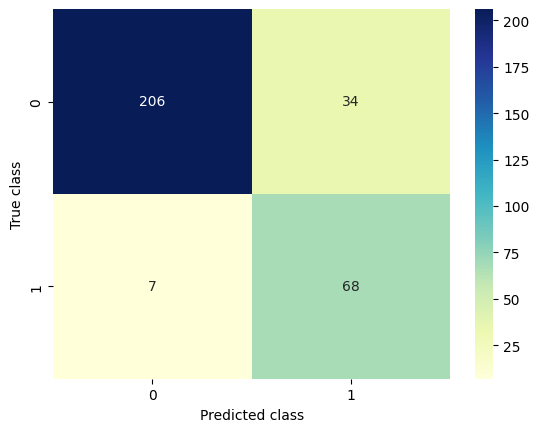

In [30]:
modelRF_bal = BalancedRandomForestClassifier()
print('* Balanced Random Forest Classifier * \n')
fit_evaluate(modelRF_bal, X_train, X_test, y_train, y_test)

The balanced random forest classifier classifies the minority class often correctly, however, at the cost of many false negatives. This shows that downsampling favors class 1, compared to other models.

* Gradient Boosting Classifier * 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       240
           1       0.79      0.72      0.76        75

    accuracy                           0.89       315
   macro avg       0.85      0.83      0.84       315
weighted avg       0.89      0.89      0.89       315


Confusion Matrix: 



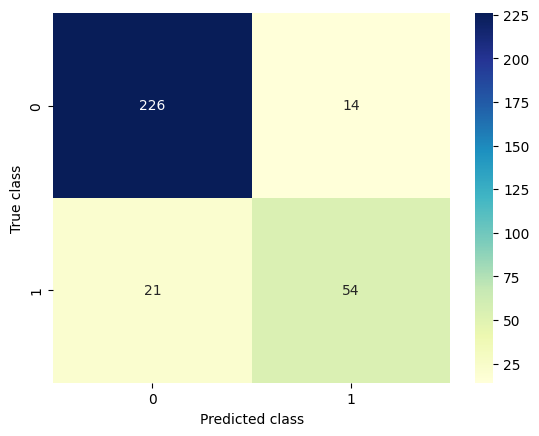

In [31]:
modelGB = GradientBoostingClassifier()
print('* Gradient Boosting Classifier * \n')
fit_evaluate(modelGB, X_train, X_test, y_train, y_test)

In [32]:
df_coded.head()

,Age,AnnualIncomeClass,ServicesOpted,Churn,BookedHotel,AccountSyncedToSocialMedia,FrequentFlyer_No Record,FrequentFlyer_Yes
0,34,1,5,0,1,0,0,0
1,34,0,4,1,0,1,0,1
2,37,1,2,0,0,1,0,0
3,30,1,1,0,0,0,0,0
4,30,0,0,0,0,0,0,0


In [33]:
input_data =(34, 1, 5, 1, 0, 0, 0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = modelGB.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==0):
    print("The Customer has not churned")
else:
    print("The customer churned")

[0]
The Customer has not churned


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [34]:
# Saving the Model
import pickle

with open('Gradient_Boosting_Classifier.pkl', 'wb') as file:
    pickle.dump(modelGB,file)

In [35]:
#Loading the model

with open('Gradient_Boosting_Classifier.pkl', 'rb') as file:
   loaded_model = pickle.load(file)


In [36]:
modelBBC = BalancedBaggingClassifier()
print('* Balanced Bagging Classifier * \n')
fit_evaluate(modelBBC, X_train, X_test, y_train, y_test)

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

The balanced bagging classifier also favors the underrepresented class 1 (churned), providing the best f1-value for the minority class and an overall good accuracy of 87%.

* K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       240
           1       0.83      0.64      0.72        75

    accuracy                           0.88       315
   macro avg       0.86      0.80      0.82       315
weighted avg       0.88      0.88      0.88       315


Confusion Matrix: 



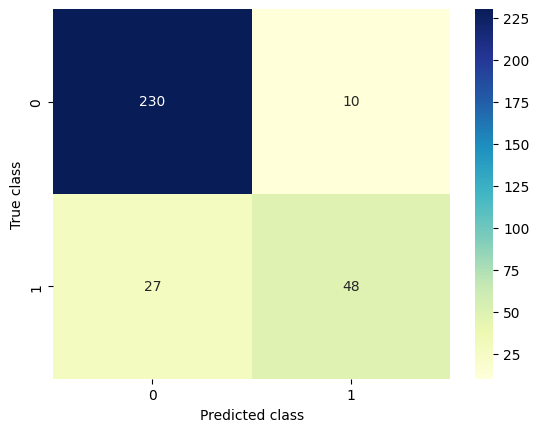

In [ ]:
modelKNN = KNeighborsClassifier()
print('* K Nearest Neighbors Classifier * \n')
fit_evaluate(modelKNN, X_train, X_test, y_train, y_test)

Minimum error: 0.108 at K = 3 



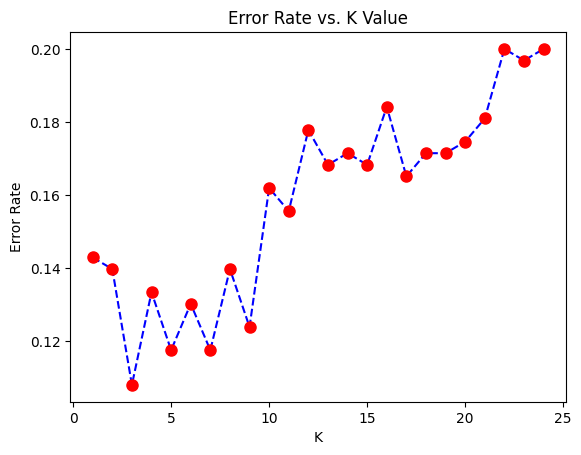

In [ ]:
# finding the best k
error_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,25), error_rate, color='b', linestyle='--', marker='o', markerfacecolor='r', markeredgecolor='r', markersize=8)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K Value')

# plotting the k value that minimizes the error
print('Minimum error:', np.round(min(error_rate), 3),'at K =', (error_rate.index(min(error_rate)) + 1), '\n');

The output "Minimum error: 0.111 at K = 1" indicates that, among the values of k tested (from 1 to 24), the lowest error rate is achieved when k is equal to 1. Let's break down the interpretation:

Minimum Error Rate: The value "0.111" represents the minimum error rate achieved in the classification when using the nearest neighbor algorithm with a specific value of k.

Optimal K: The corresponding value of k that minimizes the error rate is "1". This suggests that, based on the analysis, the K Nearest Neighbors (KNN) model performs best when considering only the nearest neighbor (the single closest data point) when making predictions.

As the default for k is 5 already in KNN, the best k is already implemented in the default KNN above

## Evaluation Metrics

1. Classification report for detailed evaluation metrics
2. Confusion matrix to describe the performance of a classification model; True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
3. Bar chats to explore the various indicators if churn.



### Results

1. Among the models we compared, the Gradient Boosting Classifier performed best in order to predict customer churn. It performed with an overall accuracy of 89%, as well as an F1 score of 76 for the minority class.

2. With the aaccuracy is 80%, Logistic Regression performs well but needs improvement. Introducing the balanced weight improved the recall for class 0 (from 0.94 to 0.79) but did not improve the overall perfomance of the model (76% accuracy)

3. The random forest classifier performs overall better than logistic regression. The balanced random forest classifier classifies the minority class often correctly, however, at the cost of many false negatives.

4. The balanced bagging classifier also favors the underrepresented class 1 (churned), providing the best f1-value for the minority class and an overall good accuracy of 87%.

5. Based on the analysis, the K Nearest Neighbors (KNN) model performs best when considering only the nearest neighbor (the single closest data point) when making predictions making it sensitve to ouliers and a risk of over fitting





## Optimization

1. Random Forest, Gradient Boosting, and Balanced Bagging are ensemble methods that generally perform well in various scenarios.

2. Introducing class_weight='balanced' in a classification model as a way of addressing imbalanced data. It assigns higher weights to the minority class, making the model pay more attention to it during training.


### Hyperparameter Tuning

Tune the hyperparameters of the Gradient Boosting Classifier using techniques such as Grid Search. Experiment with parameters like n_estimators, learning_rate, max_depth, and subsample.

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.9}
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       240
           1       0.80      0.75      0.77        75

    accuracy                           0.90       315
   macro avg       0.86      0.84      0.85       315
weighted avg       0.89      0.90      0.89       315


Confusion Matrix: 



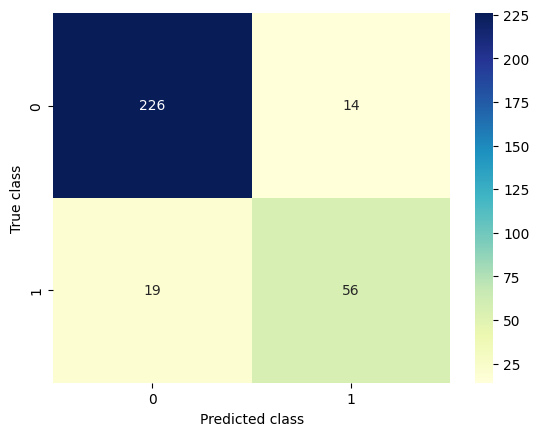

In [ ]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the model
best_modelGB = GradientBoostingClassifier(**best_params)

# Evaluate the model
fit_evaluate(best_modelGB, X_train, X_test, y_train, y_test)

* After Hyperparameter Tuning, The Model accuracy imoroved from 89% to 90%

* The Improvement is also evidenced from the confusion matrix from the change TP, TN, FP, and FN



## Discussion & Interpretation


The key indicators of customer churn were age, frequent flyer status and income class. Specifically,

* The younger customers (27-28y) tend to churn propor-
tionally more often.

* Customers who opted for more services (5+) churned
more than those who opted for a few services.

* Frequent flyers churn more than non-frequent flyers.
* High-income individuals churn more than low- and
middle-income classes.

* Customers who synced their account to social media
churned more than those who didn’t.

* Customers who used the company’s service to book a
hotel churned more than those who didn’t.
Fig. 3. Churn by Age